In [1]:
from datetime import datetime, time
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sfmta_counts_18to20 import (
    get_counts_totals,
    load_counts_sheet,
    parse_filename,
)

In [2]:
sfmta_counts_dir = r"Q:\Data\Observed\Streets\Counts\PreCountDracula\2018-2020\OneDrive_2023-05-15\2018-Feb 2020"

In [3]:
filename_parse_skipped = []
dates = []

for p in Path(sfmta_counts_dir).glob("*.xls*"):
    # without maybe monads, `continue` is cleaner than nested if-else/try-except
    parsed_filename = parse_filename(p.name)
    if not parsed_filename:  # if None
        filename_parse_skipped.append(p.name)
        print("can't parse filename:", p.name)
        continue
    _, _, directions, _, _ = parsed_filename

    for direction in directions:
        count_totals = get_counts_totals(load_counts_sheet(
            p.name, direction, sfmta_counts_dir=sfmta_counts_dir
        ))
        dates.extend(set(count_totals.index.date))
# have to convert date back to datetime first
dates = pd.Series((datetime.combine(d, time.min) for d in dates))

can't parse filename: 20180822_Deliverable_Casey Hildreth_20_FULTON RD_EB_38TH_39TH.xlsx
can't parse filename: 20180822_Deliverable_Casey Hildreth_21_FULTON RD_WB_15TH_16TH.xlsx
can't parse filename: BAYSHORE BLVD_JERROLD AVE_AM_PM.xlsx
can't parse filename: FOLSOM ST_8TH ST_AM_PM.xlsx
can't parse filename: GUERRERO ST_LAGUNA ST_MARKET ST_AM_PM.xlsx
can't parse filename: LAGUNA ST_NB_SB_HAYES_LINDEN (2).xlsx
can't parse filename: LAGUNA ST_NB_SB_HAYES_LINDEN (3).xlsx
can't parse filename: SCOTT ST_EB_WB_ELLIS_O'FARRELL.xlsx
can't parse filename: THEEMBARCADERO_TOWNSEND ST_AM_PM.xlsx
can't parse filename: VALENCIA ST_22ND ST_AM_PM.xlsx


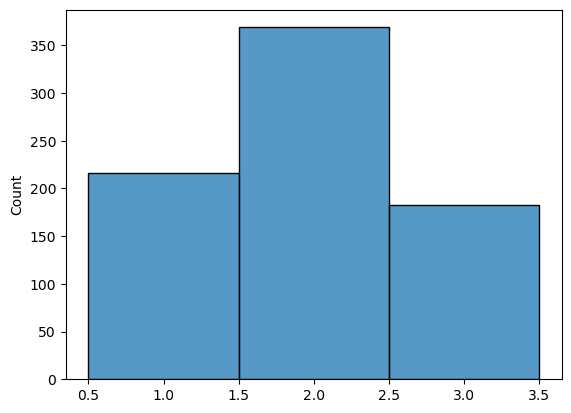

In [4]:
sns.histplot(dates.dt.dayofweek, discrete=True)
plt.show()

So all data was collected on Tue/Wed/Thu